In [172]:
import pandas as pd


In [173]:
df = pd.read_csv('supershops.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [174]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [175]:
df['Transport'] = df['Transport'].fillna(df['Transport'].mean())


In [176]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [177]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [179]:
df1.Area = le.fit_transform(df['Area'])

In [180]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [181]:
le.classes_

array(['Ctg', 'Dhaka', 'Rangpur'], dtype=object)

In [182]:
X = df1.drop('Area', axis = 1)
y = df1['Profit']

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [184]:
from sklearn.linear_model import LinearRegression


In [185]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [186]:
y_pred = linear_model.predict(X_test)

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [188]:
mse

6.988021814847977e-22

In [189]:
mae

1.8917489796876908e-11

In [190]:
r2

1.0

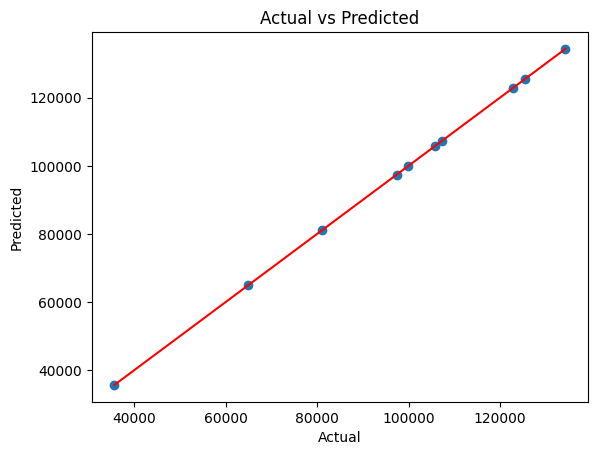

In [191]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect prediction line
plt.show()

In [192]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [193]:
oneHot = pd.get_dummies(df3['Area'], drop_first=True).astype(int)

oneHot.head()

,Dhaka,Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [194]:
df3 = pd.concat([oneHot, df3], axis=1)

In [195]:
df3.head()

,Dhaka,Rangpur,Marketing Spend,Administration,Transport,Area,Profit
0,1,0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,0,0,162597.70,151377.59,443898.53,Ctg,191792.06
2,0,1,153441.51,101145.55,407934.54,Rangpur,191050.39
3,1,0,144372.41,118671.85,383199.62,Dhaka,182901.99
4,0,1,142107.34,91391.77,366168.42,Rangpur,166187.94


In [197]:
X = df3.drop('Area',axis = 1)
X.head()

,Dhaka,Rangpur,Marketing Spend,Administration,Transport,Profit
0,1,0,114523.61,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,153441.51,101145.55,407934.54,191050.39
3,1,0,144372.41,118671.85,383199.62,182901.99
4,0,1,142107.34,91391.77,366168.42,166187.94


In [198]:
y = df3['Profit']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [200]:
Lregm = LinearRegression()
Lregm.fit(X_train,y_train)

LinearRegression()

In [201]:
yprd = Lregm.predict(X_test)

In [202]:
yprd

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86])

In [203]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

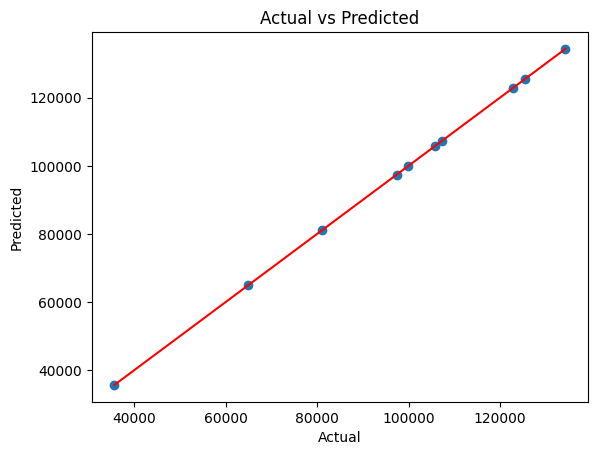

In [204]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect prediction line
plt.show()

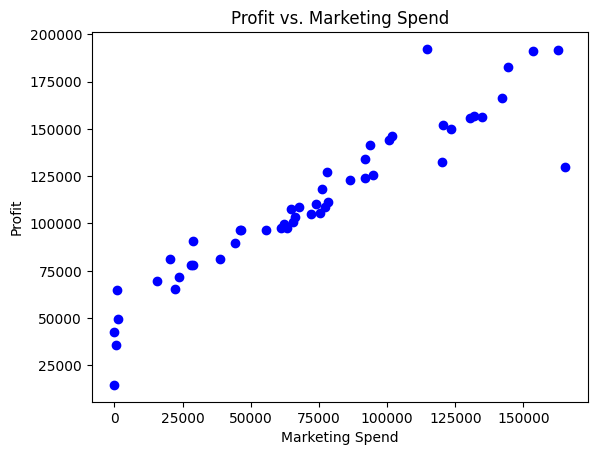

In [205]:
plt.scatter(df['Marketing Spend'], df['Profit'], color='blue')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Profit vs. Marketing Spend')
plt.show()


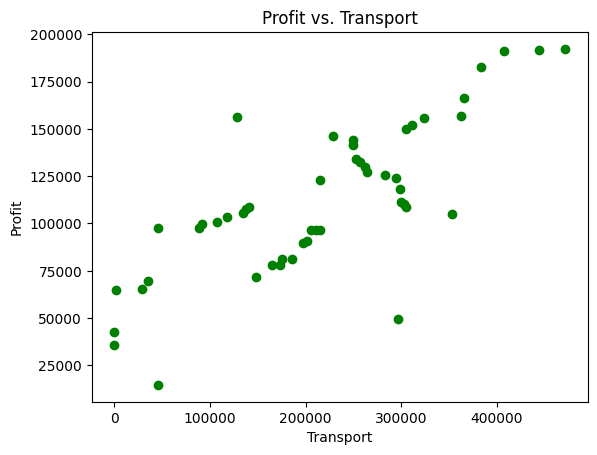

In [206]:
plt.scatter(df['Transport'], df['Profit'], color='green')
plt.xlabel('Transport')
plt.ylabel('Profit')
plt.title('Profit vs. Transport')
plt.show()


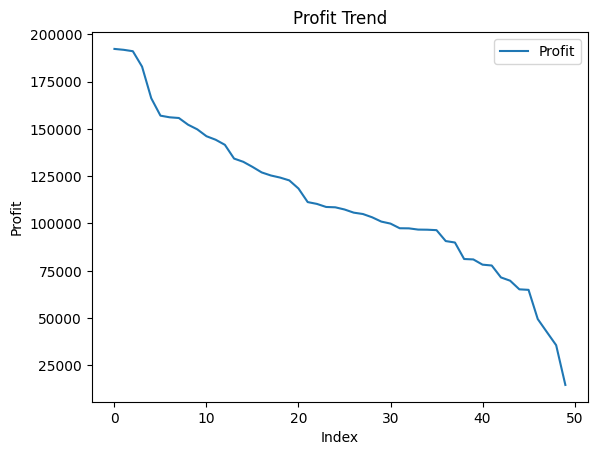

In [208]:
plt.plot(df['Profit'], label='Profit')
plt.title('Profit Trend')
plt.ylabel('Profit')
plt.xlabel('Index')
plt.legend()
plt.show()
